# Exploratory Data Analysis #
# Project- Exploring Cars #

## MIS 5470 Practical Computing for Data Analytics ##
### Project Partners- Amith Sivarai and Priyanka Sabnani ###

For a private buyer or seller who are new to the used-car market, a common confusion is about what to be expected. Therefore, this project attempts to provide a used-car evaluation service based on the on-line listing information.
The objective of the project is to discuss the features of used-car with regard to its influence on the market price. Based on such analysis, a model for price prediction could be constructed in order to provide a real-time used-car evaluation service. The final product takes features (vehicle type, make, year, Engine Fuel Type, Engine HP Driven Type , Transmission, Vehicle Style, MPG .) of a used-car as input and output a prediction of price. Moreover, it should be capable of producing an interval prediction as price range, and it should be able to handle missing features so that the user can make a query even when they are not clear about certain feature. As a more ambitious attempt, we tried a regression model and PCA Principal Component Models – Reduced similar dimensions, in order to ease the data we reduced similar dimensions that adds the same value to the data. 
Youtube link for presentation: https://youtu.be/5MiuaSN34oU

The data used in the following analysis is taken from Edmunds. It contains 10,000 observations of 16 features. We attempted to experiments with all the techniques learned in the class, tried our hands on cleaning and using functions, later we see a detailed visualization. And in last we have our models and PCA. 

This data is collected from Edmunds.Here is the link:https://www.edmunds.com/industry-center/data/consumer-vehicle-purchase-intent-by-manufacturer.html





In [1]:
# importing section
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
#Step 2: Let’s check the first five entries of dataset.

# using the Csv file
df = pd.read_csv('data.csv') 

df.head(5) 




,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


We used describe function to understand the statistics of data. It analyzes both numeric and object series and also the DataFrame column sets of mixed data types. It gave the counts of Year, Horse Power, Cylinders, MPG-H(Miles per gallon highway), MPG-C Miles per gallon city, and Price 

In [2]:
df.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


The price range of cars in the data set are from $2000 to $2065902.  
Average price of the car is $40594 approx  
The data collected is from year 1990 to 2017. Looking Cyliner range we see we have 0 as minimum that means we have some missing data in the column. A car will atleast have 3 cylinder. 


#### Checking Data types ####
Here we check  the datatypes because sometimes the MSRP or the price of the car would be stored as a string, if this is the case, we have to convert that string to the integer data. That will plot the graph smoothly. But our data is already integer, therefore we kept it as.

In [3]:
#Checking the types of data
df.dtypes


Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

#### Deleting few Coulmns from the data set ####
Every EDA have few attributes that do not hold much of the importance therefore to ease the analysis we delete them. So we decided to drop few attributes that are Engine Fuel Type, Market Category, Vehicle Style, Populaity, Number of Doors, Vehicle Size for this instance. 

In [4]:
#Dropping irrelevant columns
 

df = df.drop(['Engine Fuel Type', 'Market Category', 'Vehicle Style', 'Popularity', 'Number of Doors', 'Vehicle Size'], axis=1)
df.head(5)


,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


#### Renaming Columns #### 

We now want to rename few columns to make it simple; Its only HP now and not engine HP, Transmission type is transmission, Engine Cylinders are only Cylinders, MSRP is Price etc.. This is just to increase the readability of data. 
This is just to test to drop some columns and rename some columns, we will again read the file later and move further with our analysis. Just trying to see correlatiin with MSRP and other factors. 



In [5]:
#Renaming the columns
df = df.rename(columns={"Engine HP": "HP", "Engine Cylinders": "Cylinders", "Transmission Type": "Transmission", 
                        "Driven_Wheels": "Drive Mode",
                        "highway MPG": "MPG-H", "city mpg": "MPG-C", "MSRP": "Price" })


df.head(5)

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,MPG-H,MPG-C,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


#### Normalizing the Data- Deleting Duplicate Rows
This step is to clean the data, the data is big and have more than 10,000 records, along with it there are some duplicate values that we want to remove. Initially we had 11914 records and number of duplicate records is 989. Hence now after cleaning it we have 10925 records for further analysis.

In [6]:
 #Dropping the duplicate rows
df.shape
duplicate_rows_df = df[df.duplicated()]
print("number of dupicate rows:", duplicate_rows_df.shape)


number of dupicate rows: (989, 10)


In [7]:
df.count()
df = df.drop_duplicates()
df.head(5)
df.count()


Make            10925
Model           10925
Year            10925
HP              10856
Cylinders       10895
Transmission    10925
Drive Mode      10925
MPG-H           10925
MPG-C           10925
Price           10925
dtype: int64

#### Normalizing the Data- Deleting Missing or Null values 
Generally best technique is to replace the missing value by mean of the column but here, the number of missing value is 
just 100 out of 10,000 records. Therefore we are simply deleting them.It is just 1% of the data and  we do not feel would leave much impact. 

In [8]:
#Dropping the missing or null values.

print(df.isnull().sum())
#This is the reason in the above step while counting both Cylinders and Horsepower (HP) had 10856 and 10895 over 10925 rows.

df = df.dropna()    # Dropping the missing values.
df.count()
#Now we have removed all the rows which contain the Null or N/A values (Cylinders and Horsepower (HP)).

#Now we have removed all the rows which contain the Null or N/A values (Cylinders and Horsepower (HP)).

print(df.isnull().sum())   # After dropping the values

Make             0
Model            0
Year             0
HP              69
Cylinders       30
Transmission     0
Drive Mode       0
MPG-H            0
MPG-C            0
Price            0
dtype: int64
Make            0
Model           0
Year            0
HP              0
Cylinders       0
Transmission    0
Drive Mode      0
MPG-H           0
MPG-C           0
Price           0
dtype: int64


In [9]:
# Checking the number of rows that we cleaned 
df.count()

Make            10827
Model           10827
Year            10827
HP              10827
Cylinders       10827
Transmission    10827
Drive Mode      10827
MPG-H           10827
MPG-C           10827
Price           10827
dtype: int64

#### Normalizing the Data- Checking Outliers

An outlier is a point or set of points that are different from other points. Sometimes they can be very high or very low. 
It's often advised to detect and remove the outliers. 
For this we have used Inter Quartile Range technique IQR
We have also shown boxplot for Price, Cylinder, Horsepower and Engine Size. The points outside the box are outliers. 





Year             9.0
HP             130.0
Cylinders        2.0
MPG-H            8.0
MPG-C            6.0
Price        21327.5
dtype: float64


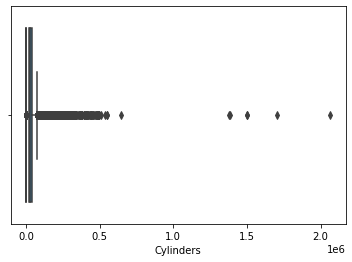

In [10]:
#Detecting Outliers

sns.boxplot(x=df['Price'])
sns.boxplot(x=df['HP'])
sns.boxplot(x=df['Cylinders'])
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1  #interquantile range 
print(IQR)




#### Normalizing Data- IQR Analysis -Removing Outliers 
We removed values above Quartile 1 and below Quartile 3 and executed Inter Quartile Outliers analysis. That left us with 9191 rows and 10 columns. 
Initially there were 10827 rows after running the IQR analysis we removed the outliers and now the count is 9191 rows and 10 columns. 


In [11]:
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape


(9191, 10)

#### The Histogram Analysis ####

Histogram refers to the frequency of occurrence of variables in an interval. In this case, we have different types of used car available for sale. With the help of histogram we can figure out number of cars and its attributes.

The graphs shows all the makes and its maximum number of units available. Chverolet has maximum cars around 1000 cars, followed by Ford, Toyota and Volkswagen and least number of cars are from brands Genesis Maserati and Alfa Romeo. 


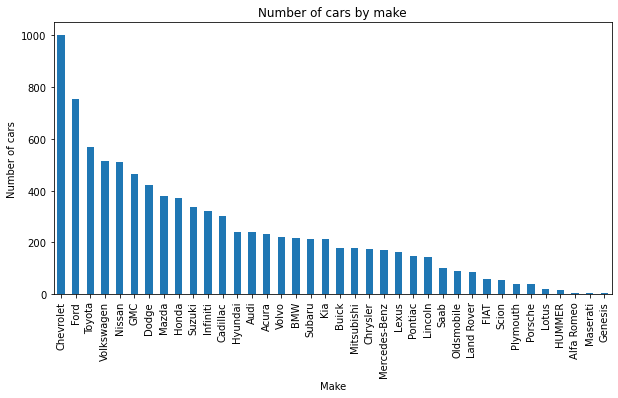

In [12]:
#Plot different features against one another (scatter), against frequency (histogram)


df.Make.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Number of cars by make")
plt.ylabel('Number of cars')
plt.xlabel('Make');

#### Heat Maps ####

Heat Maps are used to plot correlation, we can thus find dependent variables by using these plots. 
Analysis: highest correlation of price is with horsepower, if you want higher horse power you should be willing to pay more. 

We can also figure that Price is positively correlated with year, means the newer the car the more expensive it will be. 
Price is positilvely correlated with cylinders means increasing the cylinder capacity would increase the price of the car. Only 10% and 18% price hike will be there based on MPG-H and MPG-C. 

Miles per gallon will reduce 75% if we increase cylinder and 54% if increase the horse power of the car.It is decreasing the average of the car.  This is just to understand the correlation of attributes for further analysis. 

The detailed Correlation Matrix is in the last of the project. 


,Year,HP,Cylinders,MPG-H,MPG-C,Price
Year,1.000000,0.326726,-0.133920,0.378479,0.338145,0.592983
HP,0.326726,1.000000,0.715237,-0.443807,-0.544551,0.739042
Cylinders,-0.133920,0.715237,1.000000,-0.703856,-0.755540,0.354013
MPG-H,0.378479,-0.443807,-0.703856,1.000000,0.939141,-0.106320
MPG-C,0.338145,-0.544551,-0.755540,0.939141,1.000000,-0.180515
Price,0.592983,0.739042,0.354013,-0.106320,-0.180515,1.000000


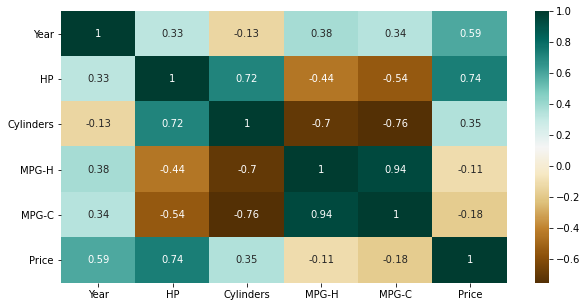

In [13]:
#Heat Maps
plt.figure(figsize=(10,5))
c = df.corr()
sns.heatmap(c,cmap='BrBG', annot= True)
c

#### Scatter Plot Analysis 

Scatter plot is used to find the correlation between Horsepower and Price of the car. It helps to understand the trendline 
Here the scatter plots are plotted between Horsepower and Price and we can see the plot below. With the plot given below, we can easily draw a trend line. As the horsepower increases the price of the car also increase. 





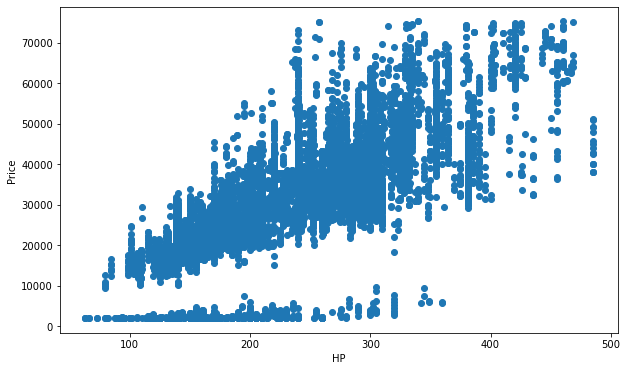

In [14]:
#Scatterplot

fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['HP'], df['Price'])
ax.set_xlabel('HP')
ax.set_ylabel('Price')
plt.show()


#### Again Reading the data from CSV file #### 
We are trying to clean the data again.. 

#### Exploratory Analysis- Missing Values 
We used seaborn heatmaps to understand the missing values, and as the result Market Category has maximum number of missing values. Follwed by Horse Power and Cylinders. 

All the values and its count in Market Category are :
Crossover                                          1110
Flex Fuel                                           872
Luxury                                              855
Luxury,Performance                                  673
Hatchback                                           641
                                                   ... 
Exotic,Luxury,High-Performance,Hybrid                 1
Crossover,Exotic,Luxury,High-Performance              1
Crossover,Exotic,Luxury,Performance                   1
Performance,Hybrid                                    1
Flex Fuel,Factory Tuner,Luxury,High-Performance       1
Name: Market Category, Length: 71, dtype: int64

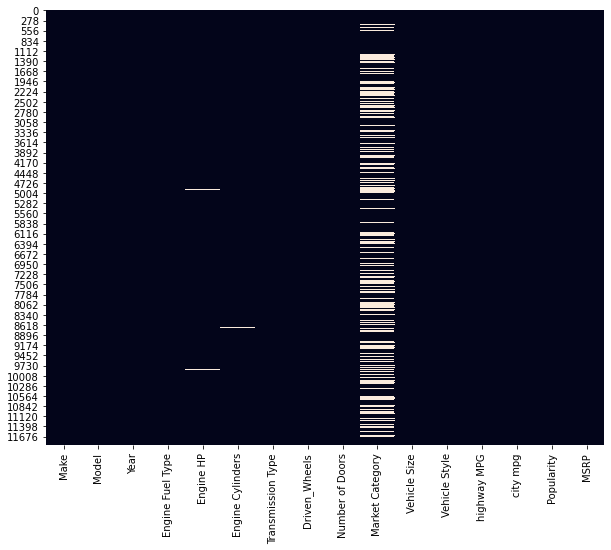

In [15]:
#Exploratory Data Analysis
#Before make any changes to original data, it's always better to make a copy of original data, and make a changes on copy.
df = pd.read_csv('data.csv') 
xdf = df.copy()
#Checking missing values
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (10,8))
sns.heatmap(xdf.isnull(), cbar = False);





In [16]:
#We observe, Market Category has the highest missing values followed by Engine HP and Enginer Cylinders

# Observing Market Category
xdf.isnull().mean().round(4).mul(100).sort_values(ascending=False)



Market Category      31.41
Engine HP             0.58
Engine Cylinders      0.25
Number of Doors       0.05
Engine Fuel Type      0.03
MSRP                  0.00
Popularity            0.00
city mpg              0.00
highway MPG           0.00
Vehicle Style         0.00
Vehicle Size          0.00
Driven_Wheels         0.00
Transmission Type     0.00
Year                  0.00
Model                 0.00
Make                  0.00
dtype: float64

In [17]:
xdf['Market Category'].value_counts()

Crossover                                          1110
Flex Fuel                                           872
Luxury                                              855
Luxury,Performance                                  673
Hatchback                                           641
                                                   ... 
Crossover,Exotic,Luxury,Performance                   1
Crossover,Exotic,Luxury,High-Performance              1
Performance,Hybrid                                    1
Flex Fuel,Factory Tuner,Luxury,High-Performance       1
Exotic,Luxury,High-Performance,Hybrid                 1
Name: Market Category, Length: 71, dtype: int64

#### Deleting Market Catgory 

Market Category is not that useful for our model, we belive we have other features for the car that are enough to understand so we decide to delete this column. We have other useful attributes like Model, Style Size and Make that would be used for further analysis.

In [18]:
#Deleting Market Category 

xdf = xdf.drop('Market Category', axis = 1)

#### Checking More Missing Values 

In [19]:
xdf.shape

## There are still other missing values Engine Hp, Engine Cylinders, Number of Doors and Engine Fuel Type
xdf['Engine HP'].isnull().sum()

69

In [20]:
null_data = xdf[xdf.isnull().any(axis = 1)]
null_data

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
539,FIAT,500e,2015,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,2.0,Compact,2dr Hatchback,108,122,819,31800
540,FIAT,500e,2016,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,2.0,Compact,2dr Hatchback,103,121,819,31800
541,FIAT,500e,2017,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,2.0,Compact,2dr Hatchback,103,121,819,31800
1983,Chevrolet,Bolt EV,2017,electric,200.0,NaN,DIRECT_DRIVE,front wheel drive,4.0,Compact,4dr Hatchback,110,128,1385,40905
1984,Chevrolet,Bolt EV,2017,electric,200.0,NaN,DIRECT_DRIVE,front wheel drive,4.0,Compact,4dr Hatchback,110,128,1385,36620
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9853,Kia,Soul EV,2016,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,4.0,Compact,Wagon,92,120,1720,31950
9854,Kia,Soul EV,2016,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,4.0,Compact,Wagon,92,120,1720,35950
11321,Suzuki,Verona,2004,NaN,155.0,6.0,AUTOMATIC,front wheel drive,4.0,Midsize,Sedan,25,17,481,17199
11322,Suzuki,Verona,2004,NaN,155.0,6.0,AUTOMATIC,front wheel drive,4.0,Midsize,Sedan,25,17,481,20199


##### Nan Values 

We see that Engine HP with NaN values is actually an Electric Vechicle . So, technically Electric vechicle doesn't have Engine but they have battery packs and they can measure horsepower. So we replaced the NaN value with 0.



In [21]:
xdf['Engine HP'] = xdf['Engine HP'].fillna(0)
xdf.isnull().sum()

Make                  0
Model                 0
Year                  0
Engine Fuel Type      3
Engine HP             0
Engine Cylinders     30
Transmission Type     0
Driven_Wheels         0
Number of Doors       6
Vehicle Size          0
Vehicle Style         0
highway MPG           0
city mpg              0
Popularity            0
MSRP                  0
dtype: int64

In [46]:
null_data = xdf[xdf.isnull().any(axis = 1)]
null_data
#len(null_data)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP


#### Cleaning Cylinders 
Changed Cylinders  Nan Values to 0

In [23]:
#This is the same case as Electric Vechicle does't have any Enginer Cylinders . So, again we will replace with 0

xdf['Engine Cylinders'] = xdf['Engine Cylinders'].fillna(0)
xdf.isnull().sum()

Make                 0
Model                0
Year                 0
Engine Fuel Type     3
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      6
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64

##### We will later fill the Nan with most popular values that is Mode (highest frequency in the column)

In [24]:
null_data = xdf[xdf.isnull().any(axis = 1)]
null_data

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
4666,Ferrari,FF,2013,premium unleaded (required),651.0,12.0,AUTOMATED_MANUAL,all wheel drive,NaN,Large,Coupe,16,11,2774,295000
6930,Tesla,Model S,2016,electric,0.0,0.0,DIRECT_DRIVE,all wheel drive,NaN,Large,Sedan,105,102,1391,79500
6931,Tesla,Model S,2016,electric,0.0,0.0,DIRECT_DRIVE,all wheel drive,NaN,Large,Sedan,101,98,1391,66000
6932,Tesla,Model S,2016,electric,0.0,0.0,DIRECT_DRIVE,all wheel drive,NaN,Large,Sedan,105,92,1391,134500
6933,Tesla,Model S,2016,electric,0.0,0.0,DIRECT_DRIVE,rear wheel drive,NaN,Large,Sedan,100,97,1391,74500
6934,Tesla,Model S,2016,electric,0.0,0.0,DIRECT_DRIVE,all wheel drive,NaN,Large,Sedan,107,101,1391,71000
11321,Suzuki,Verona,2004,NaN,155.0,6.0,AUTOMATIC,front wheel drive,4.0,Midsize,Sedan,25,17,481,17199
11322,Suzuki,Verona,2004,NaN,155.0,6.0,AUTOMATIC,front wheel drive,4.0,Midsize,Sedan,25,17,481,20199
11323,Suzuki,Verona,2004,NaN,155.0,6.0,AUTOMATIC,front wheel drive,4.0,Midsize,Sedan,25,17,481,18499


We know we can manually fill the missing data for this case, but it is not the best method to do it. Since, usually we have to deal to huge amount of missing datas. So we wll use mode for Number of Doors and fill the popular Engine Fuel Typethat is regular unleaded. 


In [25]:
#Mode for number doors 
xdf['Engine Fuel Type'].value_counts()
#xdf['Number of Doors'] = xdf['Number of Doors'].fillna(xdf['Number of Doors'].mode())
xdf['Number of Doors'] = xdf['Number of Doors'].fillna(4.0)
xdf['Engine Fuel Type'] = xdf['Engine Fuel Type'].fillna('regular unleaded')
xdf['Engine Fuel Type'].value_counts()

regular unleaded                                7175
premium unleaded (required)                     2009
premium unleaded (recommended)                  1523
flex-fuel (unleaded/E85)                         899
diesel                                           154
electric                                          66
flex-fuel (premium unleaded required/E85)         54
flex-fuel (premium unleaded recommended/E85)      26
flex-fuel (unleaded/natural gas)                   6
natural gas                                        2
Name: Engine Fuel Type, dtype: int64

In [26]:
xdf.isnull().sum()

Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64

#### Above is a missing value free 0 data 
and now lets look for outliers to make models 

#### Detecting Outliers and Fixing it 

In [27]:
#Hence, we have NaN free data. Moving to the Outliers

#Fixing Outliers
xdf.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11914.000000,11914.000000,11914.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,247.941749,5.614655,3.436377,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,110.507669,1.800554,0.881184,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,0.000000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.000000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,225.000000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.000000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.000000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


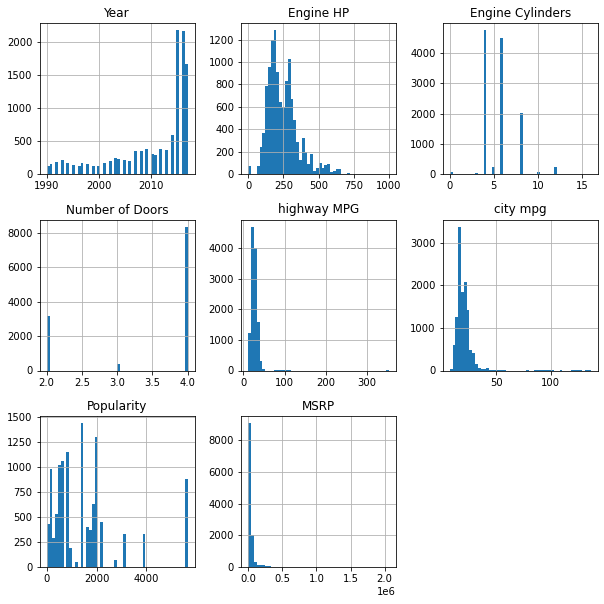

In [28]:
xdf.hist(bins = 50, figsize = (10,10));

#### We tried to find Outliers using Bloxplots analysis and then removed them using IQR method.

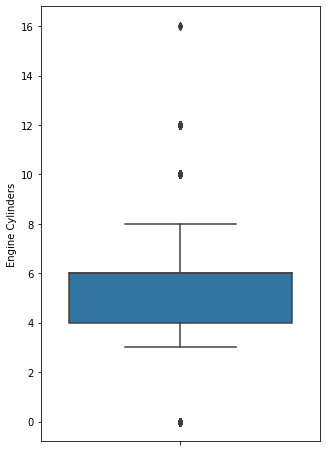

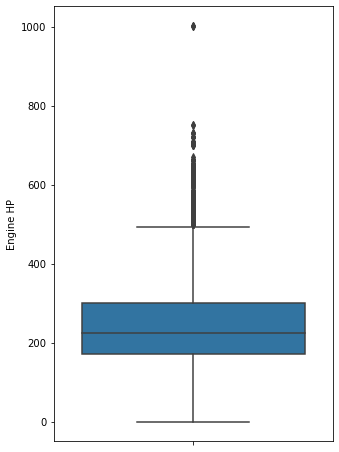

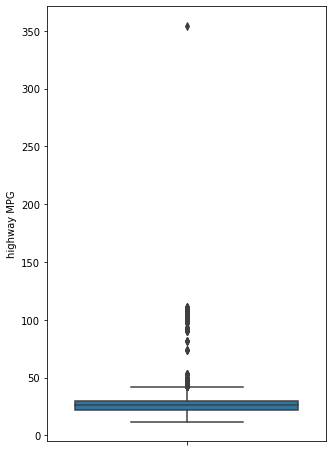

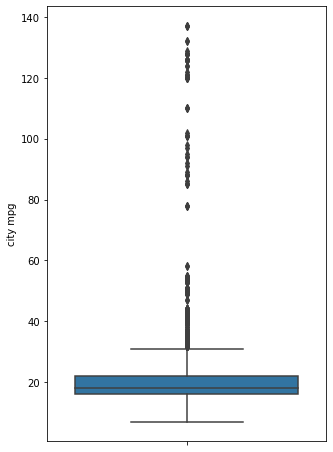

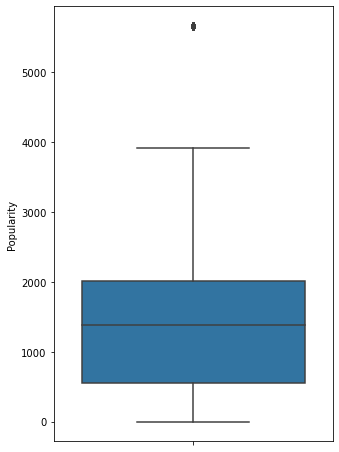

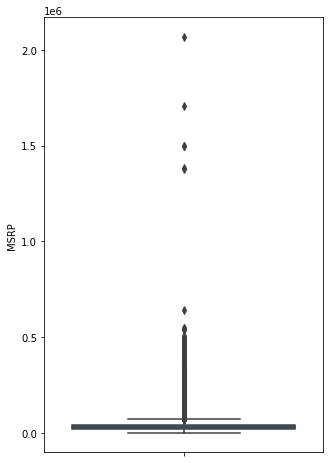

In [29]:
# Boxplots
## Engine Cylinders
plt.figure(figsize = (5,8))
sns.boxplot(data = xdf, y = 'Engine Cylinders');
## Engine HP
plt.figure(figsize = (5,8))
sns.boxplot( data = xdf, y = 'Engine HP');
## highway MPG
plt.figure(figsize = (5,8))
sns.boxplot(data = xdf, y = 'highway MPG');
## city mpg
plt.figure(figsize = (5,8))
sns.boxplot(data = xdf, y = 'city mpg');
## popularity
plt.figure(figsize = (5,8))
sns.boxplot(data = xdf, y = 'Popularity');
plt.figure(figsize = (5,8))
sns.boxplot(data = xdf, y = 'MSRP');
out_xdf = xdf.copy()

We can see we have concentrated data for Engine Cylinder 4 to 6 

*Engine Horse power 200 to 350

*Miles per gallon highway 30-40

*Miles per gallon city 20

*Popularity from 1000 to 2000 

*Price is 10, 000 to 20,000 




#### Outleirs Removal 
We calculated Q1 with 25% and Q3 75% 
After that we removed the extremes by subtracting 1.5 * IQR from Q1 and adding 1.5 * IQR in Q3. By doing this we removed the outliers from both the ends and renamed the data as df_no_outlier.

In [30]:
## Let's clean the dataset
def removingoutliers(dataframe, column):
    Q1 = dataframe[column].quantile(0.25)
    Q3 = dataframe[column].quantile(0.75)
    
    IQR = Q3 - Q1
    min = Q1 - 1.5 * IQR
    max = Q3 + 1.5 * IQR
    
    df_no_outlier = dataframe[(dataframe[column] > min ) & (dataframe[column] < max)]
        
    return df_no_outlier

#### Outliers removal for all columns  
Now we removed outliers for all our columns. 


In [31]:
## Removing Outlier for MSRP
out_xdf = removingoutliers(out_xdf, "MSRP")
## Popularity

out_xdf = removingoutliers(out_xdf, "Popularity")
## City Mpg

out_xdf = removingoutliers(out_xdf, "city mpg")
## highway MPG

out_xdf = removingoutliers(out_xdf, "highway MPG")
## Engine HP

out_xdf = removingoutliers(out_xdf, "Engine HP")
## Engine Cylinders

out_xdf = removingoutliers(out_xdf, "Engine Cylinders")
out_xdf.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,9671.000000,9671.000000,9671.000000,9671.000000,9671.000000,9671.000000,9671.000000,9671.000000
mean,2009.984283,226.273808,5.337711,3.495192,26.633440,19.437804,1199.939406,28584.348568
std,7.801305,76.646144,1.376154,0.853457,5.798384,4.420835,852.597148,15954.528147
min,1990.000000,0.000000,3.000000,2.000000,12.000000,10.000000,21.000000,2000.000000
25%,2006.000000,168.000000,4.000000,3.000000,23.000000,16.000000,549.000000,19892.500000
50%,2014.000000,210.000000,6.000000,4.000000,26.000000,19.000000,873.000000,28380.000000
75%,2016.000000,285.000000,6.000000,4.000000,31.000000,22.000000,1851.000000,38482.500000
max,2017.000000,455.000000,8.000000,4.000000,42.000000,33.000000,3916.000000,74000.000000


## Data Visualization ##

The data cleaning is complete now, we are not looking at the data and analzing it in following steps:

In [32]:
##Data Visualization
#To gain more insights from our data, and check the relationship between the features we use Data Visualization technique.

out_xdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9671 entries, 0 to 11913
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               9671 non-null   object 
 1   Model              9671 non-null   object 
 2   Year               9671 non-null   int64  
 3   Engine Fuel Type   9671 non-null   object 
 4   Engine HP          9671 non-null   float64
 5   Engine Cylinders   9671 non-null   float64
 6   Transmission Type  9671 non-null   object 
 7   Driven_Wheels      9671 non-null   object 
 8   Number of Doors    9671 non-null   float64
 9   Vehicle Size       9671 non-null   object 
 10  Vehicle Style      9671 non-null   object 
 11  highway MPG        9671 non-null   int64  
 12  city mpg           9671 non-null   int64  
 13  Popularity         9671 non-null   int64  
 14  MSRP               9671 non-null   int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 1.2+ MB


Here we see number of vehicles available by different brands. The highest is Chevrolet, followed by Volkswagen and Toyota. 
The least are Alpha Romeo Genesis and Maserati.

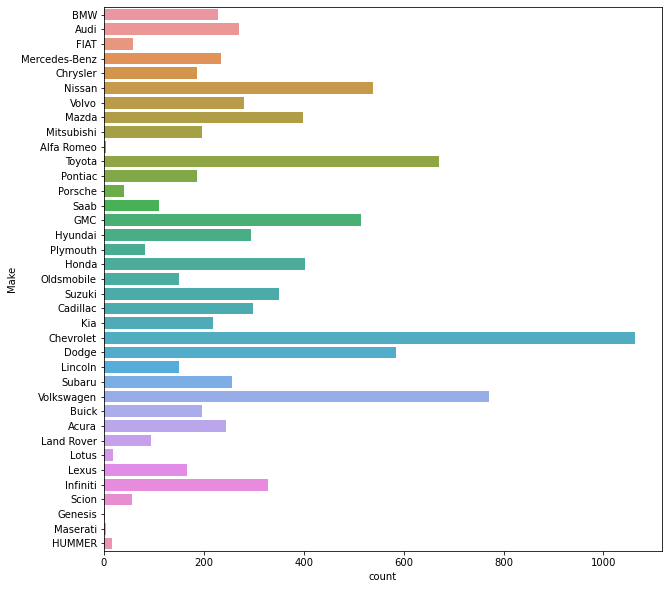

In [33]:
plt.figure(figsize = (10,10))
sns.countplot(data = out_xdf, y = "Make");

### Barplot with Make and Price ###
We see the most expensive cars in the data sets are Maserati (No.1), followed by Alpha Romeo.

An Analyst View : Also these are the high priced cars we can draw insights of consumer behaviour of people that People generally don’t buy premium high priced cars big brands like Maserati or Alpha Romeo as a second hand purchased or as a used car .. Further it maybe these car have really high maintenance and maybe the overall price to have these premium car is more than what we see in graph.. For example to replace some part in event of damage or accident the cost to the buyer would be more but if the car is from the mid range popular ones maybe its easy to maintain. So these might be a consumer expectations from a used car segment that we can look into to do better business. 



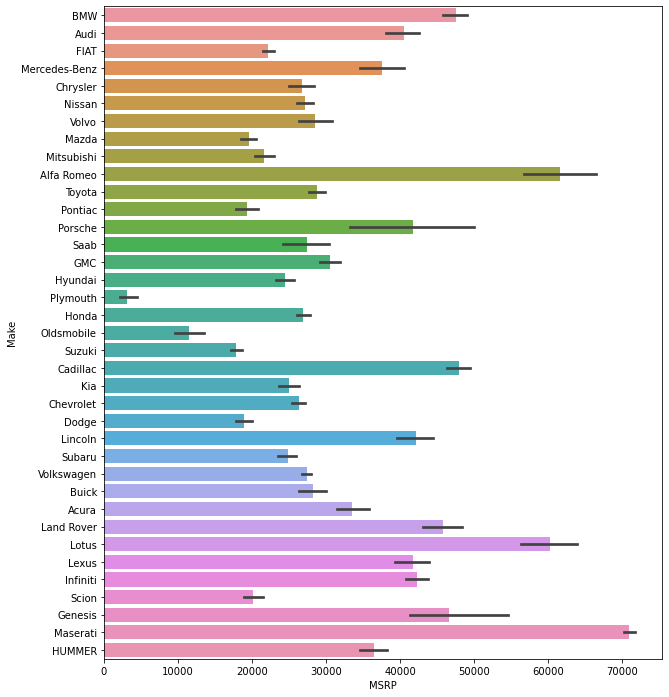

In [34]:
#Chevrolet,Volkswagen,Toyota,Nissan:These cars has largest population, obviously they are widely used brands with average price all over the world. Premium or Luxurious cars are lessly populated.
#HUMMER,Maserati,Alfa Romeo,Let's observe the same figure with price

plt.figure(figsize = (10,12))
sns.barplot(data = out_xdf, y = "Make", x = "MSRP");

#### Checking the models 
We see highest number of model is Silverado that is a model from Chev and probably this model is making Chev topping the list. 
Second is Tundra it is a car from Toyota that has second most highest count. 

In [47]:
#It's clear. Maserati , HUMMER , Land Rover , Alfa Romeo these are expensive cars.

#Let's check the Model of the Cars

out_xdf["Model"].value_counts()

Silverado 1500        156
Tundra                140
Sierra 1500            90
Beetle Convertible     89
Tacoma                 80
                     ... 
S60 Cross Country       1
Omni                    1
Levante                 1
V90                     1
Pulsar                  1
Name: Model, Length: 703, dtype: int64

#### Checking the Fuel Type 
Here we want to analyze what type of fuel cars we have, what is the most widely used fuel that is being used by the stock. 
Most of the cars have regular unleaded fuel and then premium unleaded. 

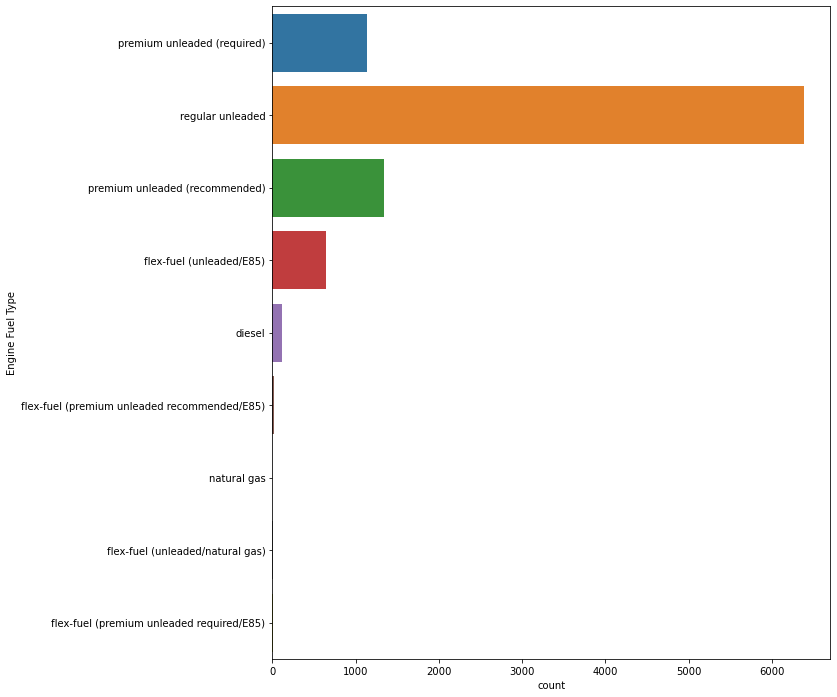

In [36]:
#There 703 unique models. This features is useless for visualization, as single brand consist of multiple models.

#Let's see Engine Fuel Type

out_xdf['Engine Fuel Type'].value_counts()
plt.figure(figsize = (10,12))
sns.countplot(y = "Engine Fuel Type", data = out_xdf);

 Graph 1 shows engine fuel type and price: Expensive cars that cost around $60, 000 drives on Flex Fuel Type. And the non premium cars drives with regular unleaded fuel type which is also the most popular fuel type. Also the most popular models are from Chevy AND Toyota we saw earlier and they use unleaded fuel probably making this fuel most popular ones. 
Natural gas is the most popular fuel type and Flex fuel that is being used in more expensive cars is the least popular. Probably we have less inventory of premium cars that means less sale and lesser popularity of the fuel used by such cars. 

And finally we see a scatter plot that shows the relation between Horse power and price and suggest the strong horse power increase the price of the car Also the premium cars that hit the range of $70000 have the max horse power 

But most of the data is between $20000  to  $45000 priced cars and they have HP between 200-300. 



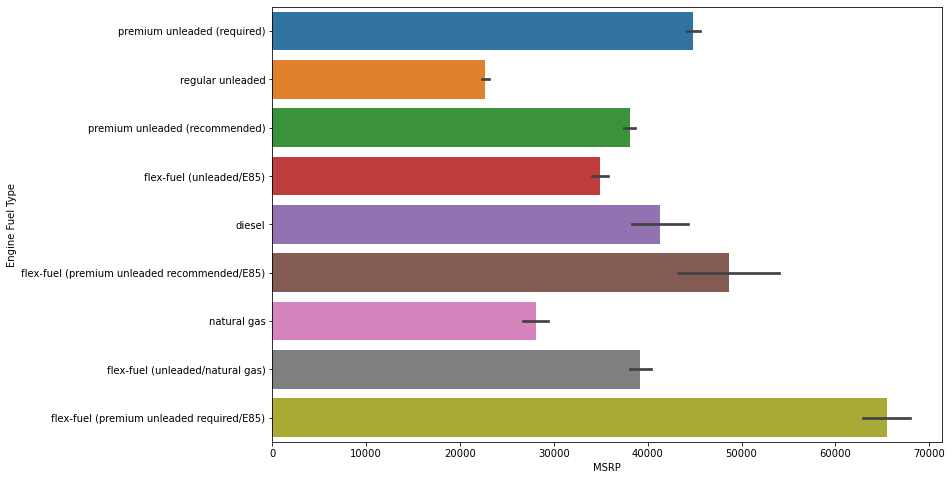

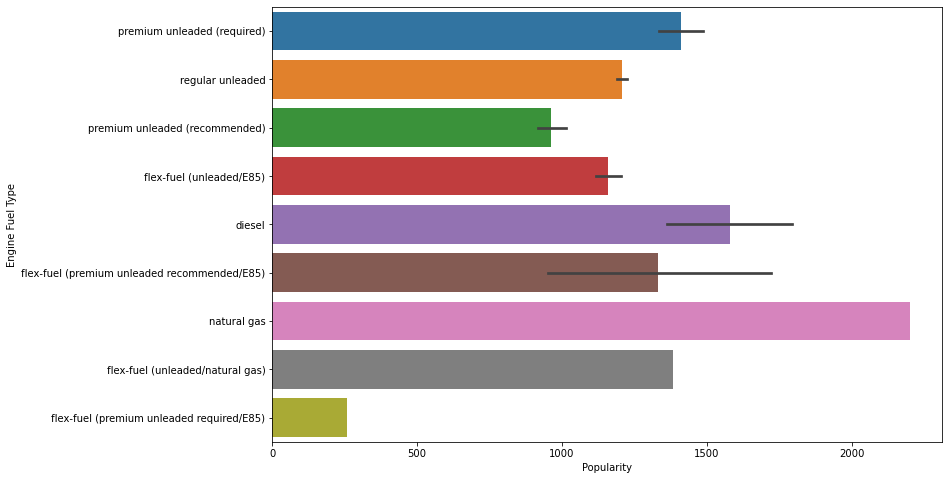

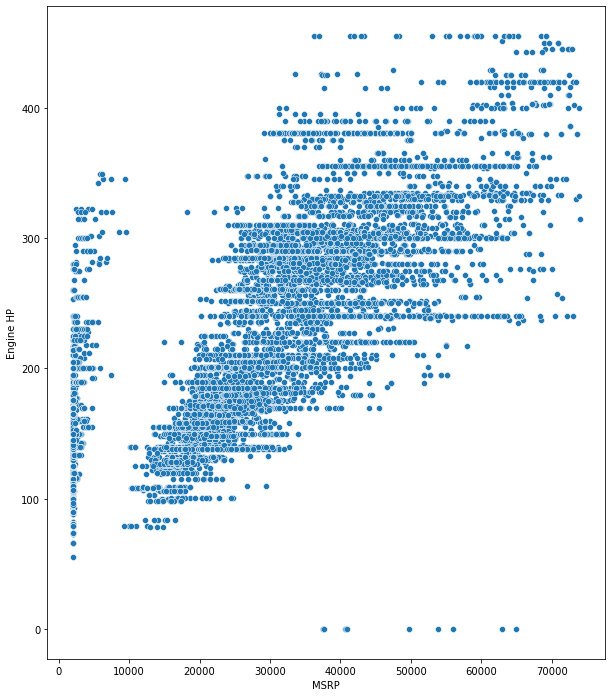

In [37]:
## Engine Type By price

plt.figure(figsize = (12,8))
sns.barplot(y = "Engine Fuel Type", x = "MSRP", data = out_xdf);

## Engine Type By Popularity

plt.figure(figsize = (12,8))
sns.barplot(y = "Engine Fuel Type", x = "Popularity", data = out_xdf);
#Engine HP

plt.figure(figsize = (10,12))
sns.scatterplot(data = out_xdf, y = "Engine HP", x = "MSRP");



#### Analysing Engine Type and Price 
We have V3 to V8 engine types, V8 are the most expensive ones approx $40000, V6 is second most expensive cylinders and V4 is third most expensive engine cylinders. 

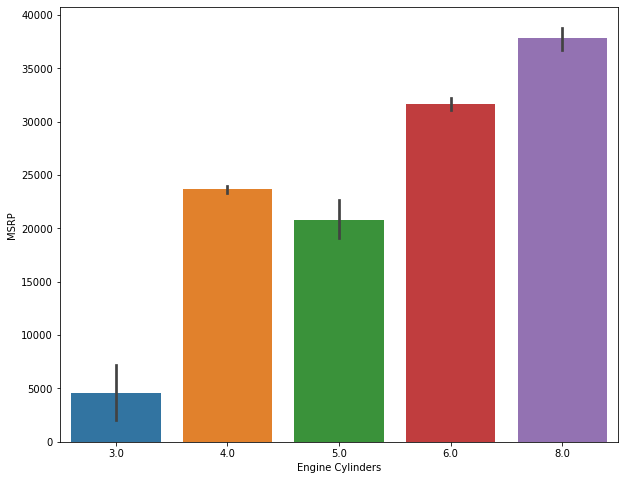

In [38]:
#Ignore the 0 HP, it is from Electric Car . The more the HP the more it is expensive.

#Engine Cylinders

## Checking it by Price

plt.figure(figsize = (10,8))
sns.barplot(x = 'Engine Cylinders', y = 'MSRP', data = out_xdf);

#### Cylinders and Popularity 
It is interesting to know that the most expensive Cylnder is the most Popular one, Customers prefer V8 more than any other cylinder and next is V6. 

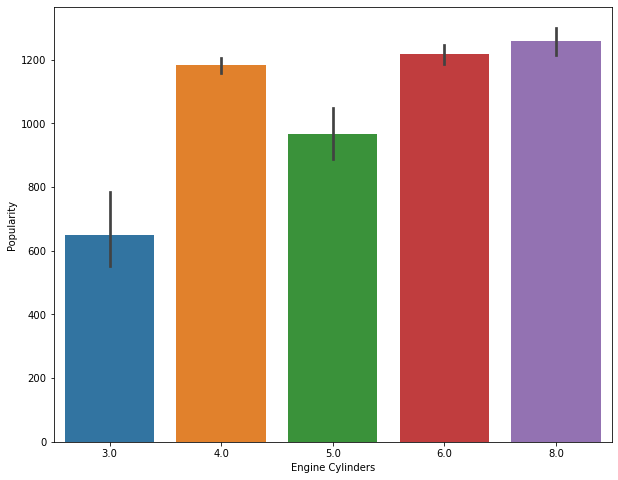

In [39]:
# high Engine Cylinders tends to be more expensive.

## Checking it by Price

plt.figure(figsize = (10,8))
sns.barplot(x = 'Engine Cylinders', y = 'Popularity', data = out_xdf);

#### Transmiission and Price 

Automated manual transmission (AMT), also known as a clutchless manual, denotes a type of multi-speed motor vehicle transmission system that is closely based on the mechanical design and internal build of a conventional manual transmission, and uses automation to operate either the clutch, and/or the gear shifting.These are also the most popular transmission type 

Second is Automatic Transmission which is also second expensive and pretty near to the AMT. 

##### Hence the most expensive transmisiion type the is the most popular one as well. 



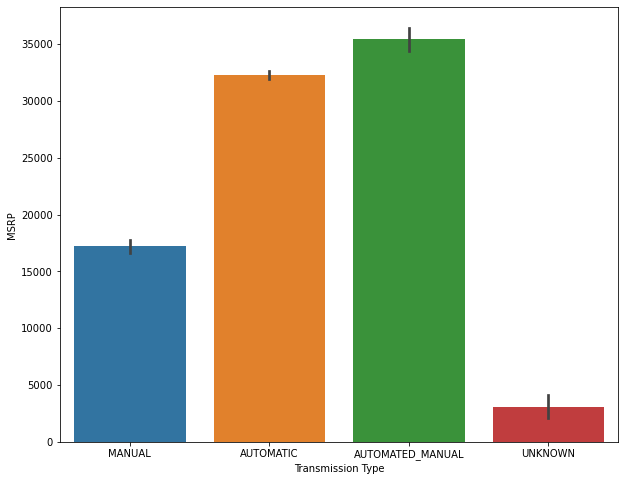

In [40]:
#Transmission Type

## Checking it by Price
plt.figure(figsize = (10,8))
sns.barplot(x = 'Transmission Type', y = 'MSRP', data = out_xdf);

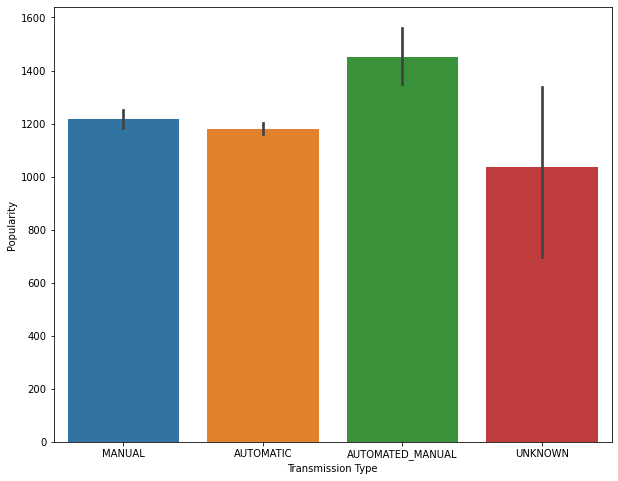

In [41]:
#We see AUTOMATED_MANUAL is the expensive one.

## Checking it by Popularity 

plt.figure(figsize = (10,8))
sns.barplot(x = 'Transmission Type', y = 'Popularity', data = out_xdf);

#### Driven Wheels with Populairity 
We see the most popular driven wheels are all wheel drive and four wheel drive and slighly below is rear wheel and least popular is front wheel. 

This is good to know because it also a measure for safety annd All wheel drive and four wheel drive would be prone less to accidents on snow. So they are popular because they are safe Wheels to drive in snow. 

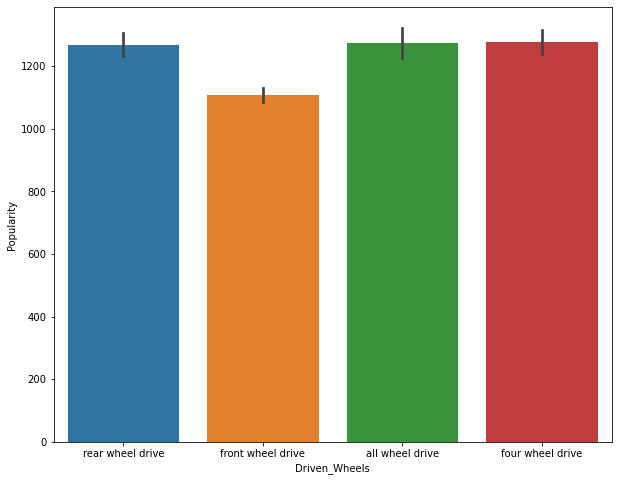

In [42]:
#Driven_Wheels

## Checking it by Popularity

plt.figure(figsize = (10,8))
sns.barplot(x = 'Driven_Wheels', y = 'Popularity', data = out_xdf);

Although all wheel drive and four wheel drive are equally popular but it is interesting to know that the most expensive is all wheel drive and four wheel drive and rear wheel drive are quite equal. 

##### This is again an interesting fact to know four wheel drive is cheaper that all wheel drive but equally Pouplar among wheels drive 

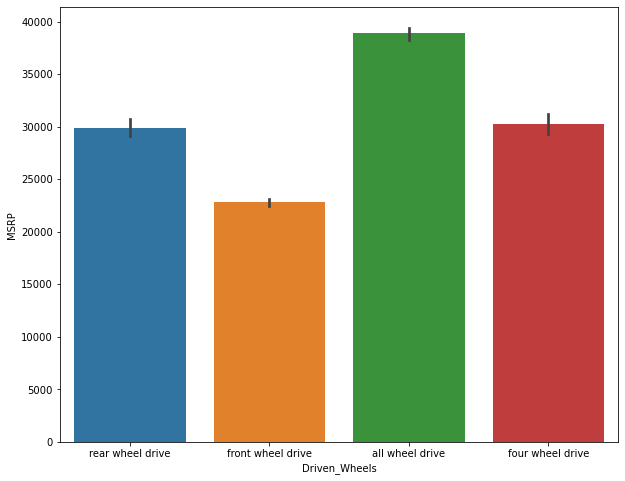

In [43]:
## Checking it by Price
plt.figure(figsize = (10,8))
sns.barplot(x = 'Driven_Wheels', y = 'MSRP', data = out_xdf);

#### Populairity with Number of Doors 

Sports cars are usually only rear wheel drive . This is because all wheel drive adds weight and complexity to the car which does reduce its performance.
However, Four Wheel Drive and all wheel drive are most commonly seen in modern-day SUV's and Pickup Trucks.

Three door cars:  car with a rear hatchback (a large door which includes the rear window, which opens so you could technically climb into the back seats through the boot) plus one regular door on each side is classed as a three-door car. Example Velostar from Hyundai, Aero start from Ford and Astro cargo from Chevrolet 

The median value of popularity is more for a two door vehicle as compared to a four door vehicle, However inter quartile range is same for both of them. For three door vehicle the popularity is significantly low. 








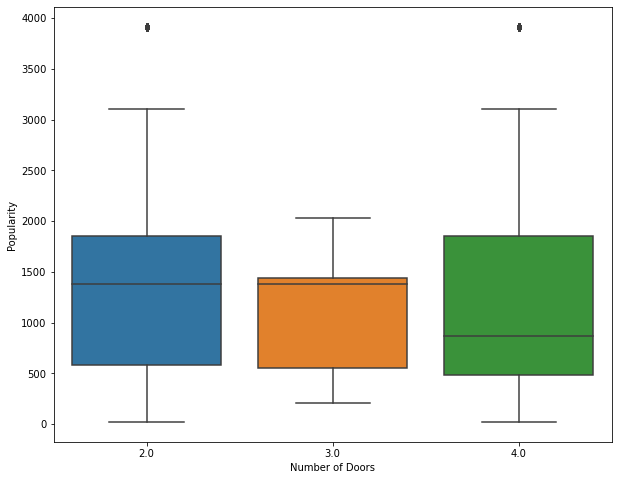

In [284]:
## BY its Popularity and Number of Doors 

plt.figure(figsize = (10,8))
sns.boxplot(x = 'Number of Doors', y = 'Popularity', data = out_xdf);

#### Price and Populairity 

Door -2 starts around $4000 and median value is at $22000 approx and 75% of the values are at  $34000

Door -3 starts around $2000 or $3000 median value is at $20000 and 75% of the values are at $25000 

Door -4 starts at more than $20000 median value is $30000 and 75% of the values are at $40000 

This implies door 4 are the maximum cars and the expensive ones as compared to 2 and 3 doors.

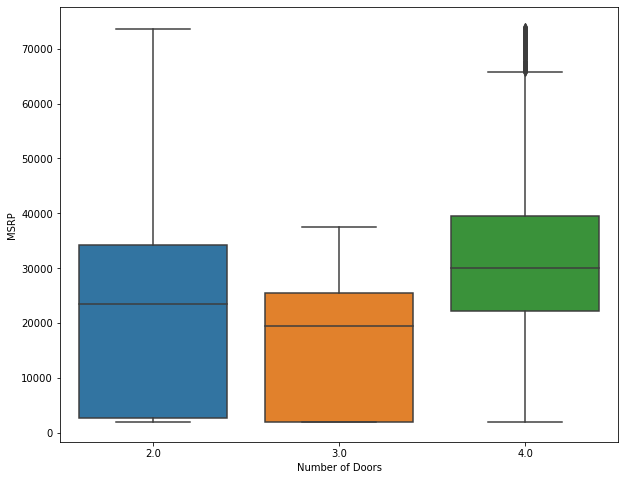

In [285]:
## BY its price

plt.figure(figsize = (10,8))
sns.boxplot(x = 'Number of Doors', y = 'MSRP', data = out_xdf);

#### Count of types of Vehicle styles 

Most of the cars sold are Sedan, 4 door SUV and Coupe. 

Least cars sold are convertible SUV's. 

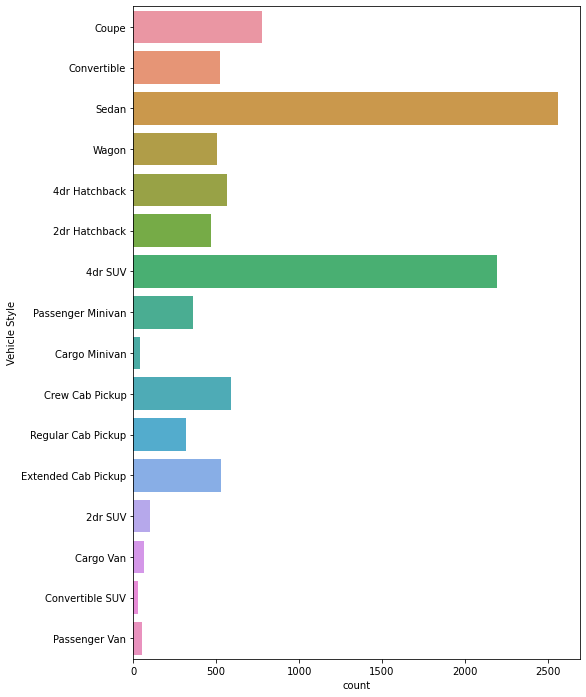

In [286]:
#2 doors vechicle are often Sports car which is expensive.

#Vechicle Style

## Plotting the count

plt.figure(figsize = (8,12))
sns.countplot(y = "Vehicle Style", data = out_xdf);

Most expensive is Crew Cabs and Silverado and Tundra are Crew cabs only. Average price of these cars is $37000 

Convertible is also one of the expensive cars for $84220 , the maximum range we have cars is in 



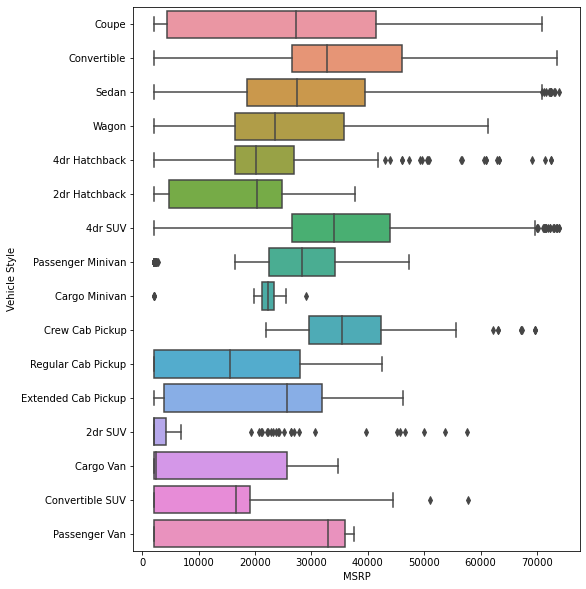

In [287]:
## Let's compare it with price

plt.figure(figsize = (8,10))
sns.boxplot( x= "MSRP", y = "Vehicle Style", data = out_xdf);

#4 Dr (Door) Suv , Coupe , Convertible , Sedan has higher price, as it is true.

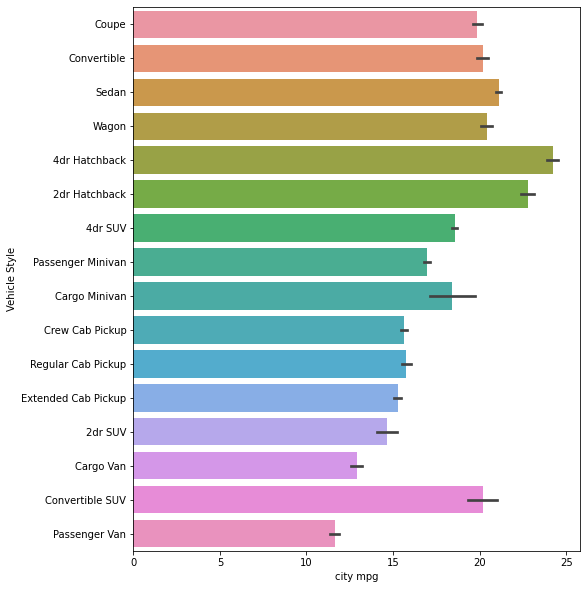

In [288]:
## With it's City MPG

plt.figure(figsize = (8,10))
sns.barplot( x= "city mpg", y = "Vehicle Style", data = out_xdf);


#### Count for Cars on basis of Highway Miles Per Gallon (mpg)

Those cars who give mileage of 24 MPG are the majority or have the highest count in the car inventory. And the least mileage around 13 or 14 MPG have the count of around 20/30. 


##### Highway MPG vs Price with Hue of Driven Wheels  

For the higher values of Highway MPG it seems that the rear wheel drives are the most expensives ones. Followed by all wheel drive so customer who wants good mileage may choose a front wheel drive or an all wheel drive over a rear wheel drive. 

It is also interesting to know that for Front wheel drives as mileage increases from 17-20 the price drops sharply, 
the similar pattern is observed for an all wheel drive but for a different mileage range that is maybe 10- 17 MPG. 

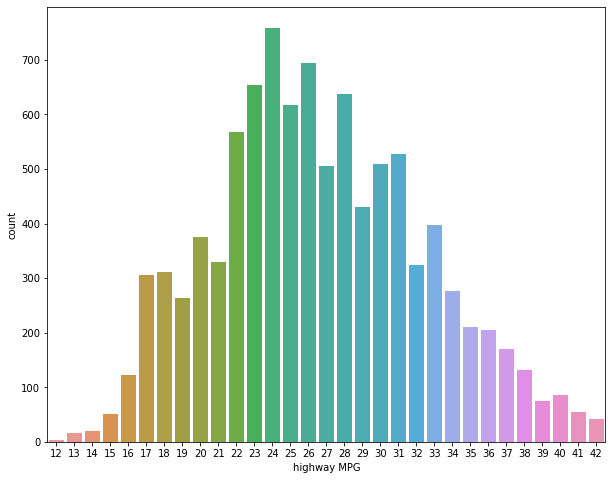

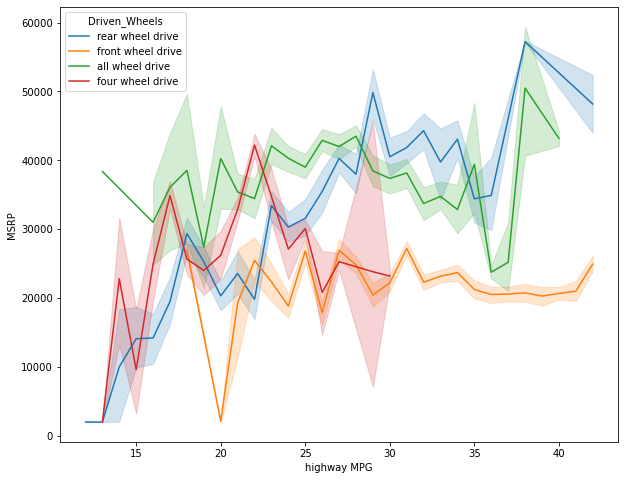

In [289]:
#highway MPG

plt.figure(figsize = (10,8))
sns.countplot(x = "highway MPG", data = out_xdf);

plt.figure(figsize = (10,8))
sns.lineplot(data = out_xdf, x = "highway MPG", y = "MSRP", hue = "Driven_Wheels");

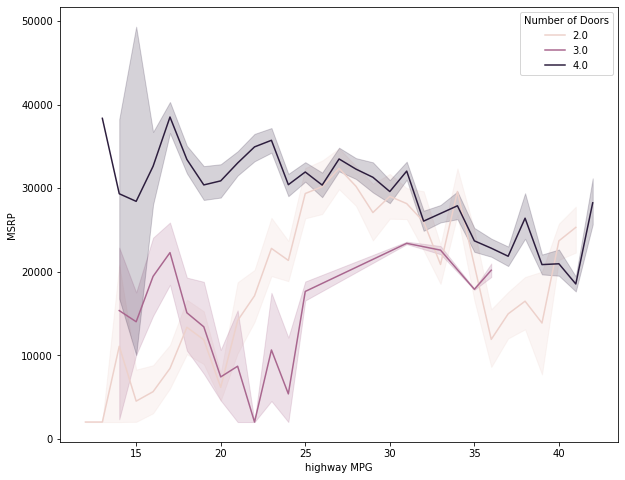

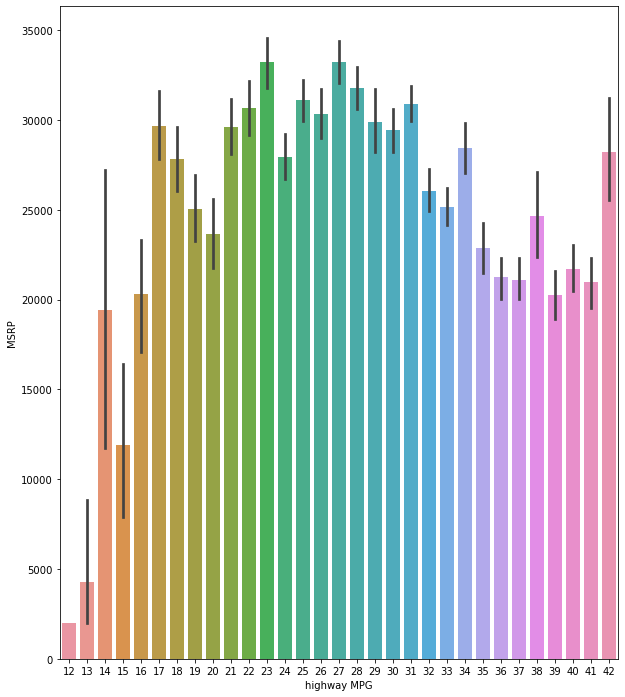

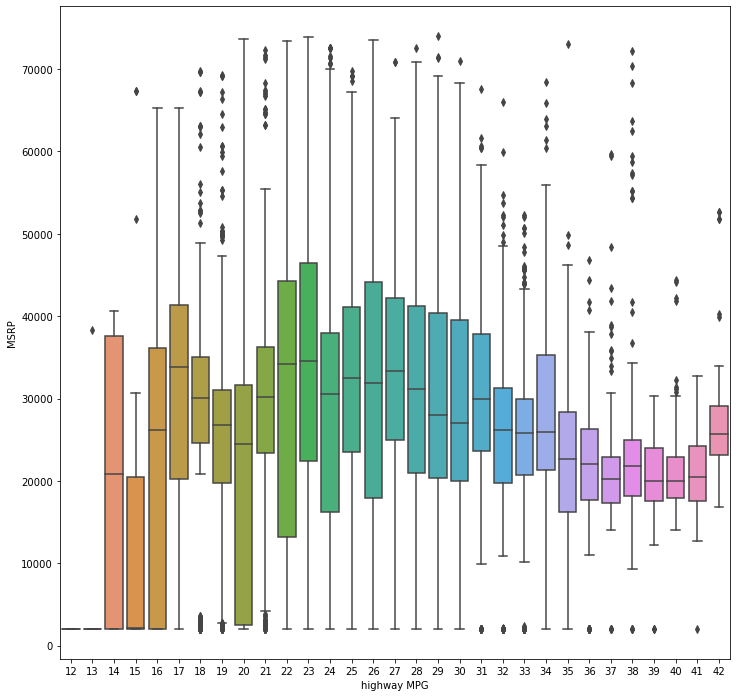

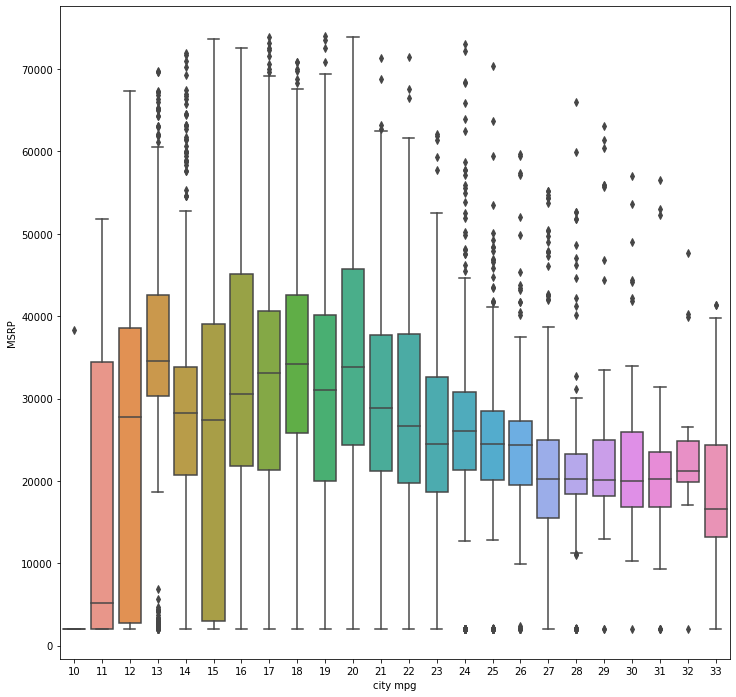

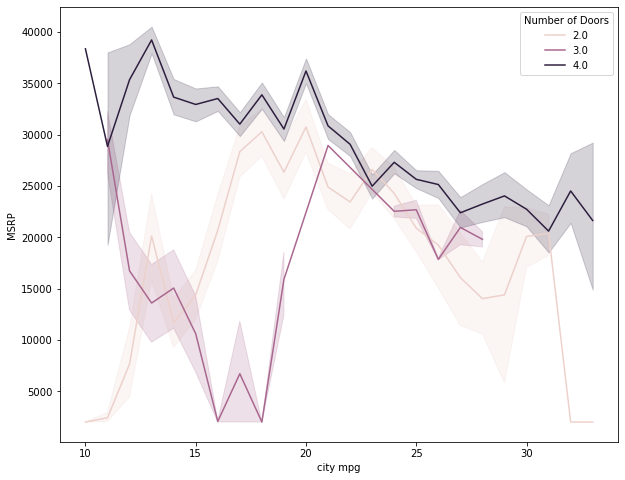

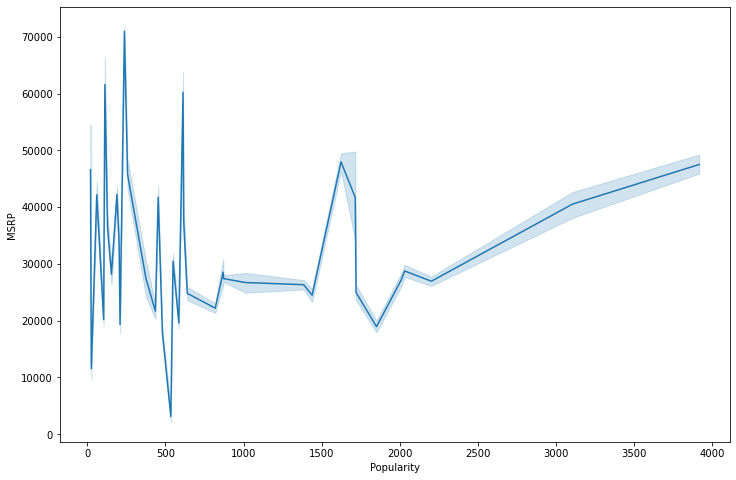

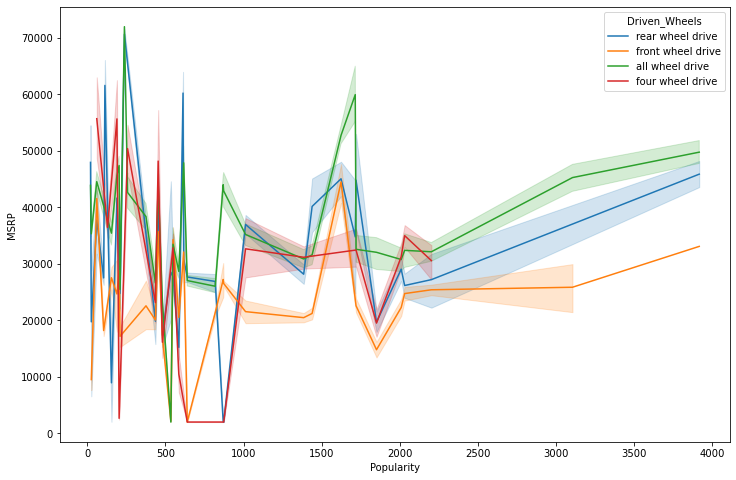

In [290]:
## With number of Doors 

plt.figure(figsize = (10,8))
sns.lineplot(data = out_xdf, x = "highway MPG", y = "MSRP", hue = "Number of Doors");

# With the Price

plt.figure(figsize = (10,12))
sns.barplot(data = out_xdf, x = "highway MPG", y = "MSRP");

#Highway MPG: Highway MPG is the average MPG for your car on the highway. Even though you'll be driving faster and often for longer stretches of time, highways are smoother than city roads and keep your engine running at consistent levels, which requires less gas

plt.figure(figsize = (12,12))
sns.boxplot(data = out_xdf, x = "highway MPG", y = "MSRP");

#city mpg

out_xdf['city mpg'].value_counts()

## let's compare it with price
plt.figure(figsize = (12,12))
sns.boxplot(data = out_xdf, x = "city mpg", y = "MSRP");
plt.figure(figsize = (10,8))
sns.lineplot(data = out_xdf, x = "city mpg", y = "MSRP", hue = "Number of Doors");

#MPG depends on the vehicle. For a hybrid car, 19 MPG is bad. For a large pickup truck, 19 MPG is good.

#popularity

##
plt.figure(figsize = (12,8))
sns.lineplot(x = "Popularity", y = "MSRP", data = out_xdf);

plt.figure(figsize = (12,8))
sns.lineplot(x = "Popularity", y = "MSRP", data = out_xdf, hue = "Driven_Wheels");

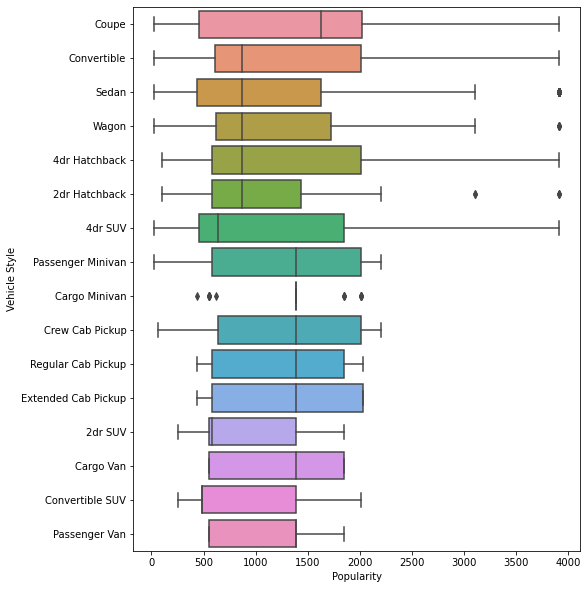

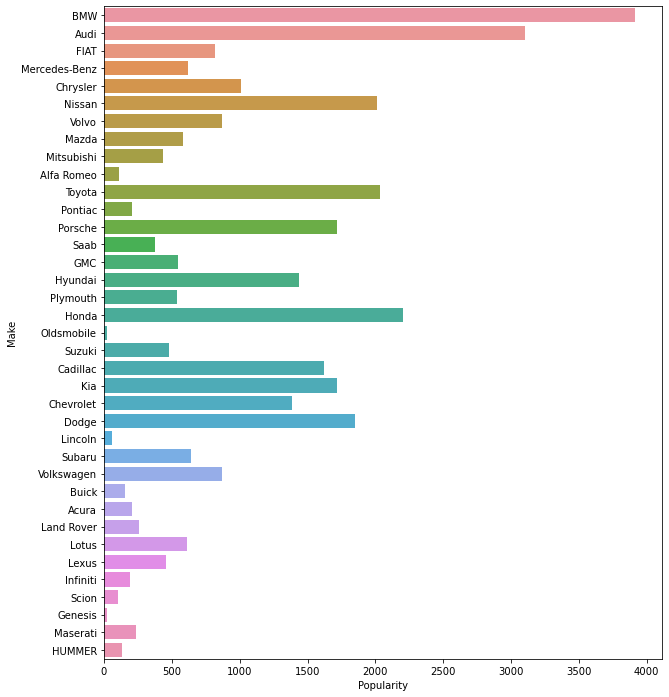

In [291]:
#Green line, outstands all i.e all wheel drive the popular one

## which Vechicle style is popular

plt.figure(figsize = (8,10))
sns.boxplot( x= "Popularity", y = "Vehicle Style", data = out_xdf);

## let's see by Brand

plt.figure(figsize = (10,12))
sns.barplot(data = out_xdf, y = "Make", x = "Popularity");

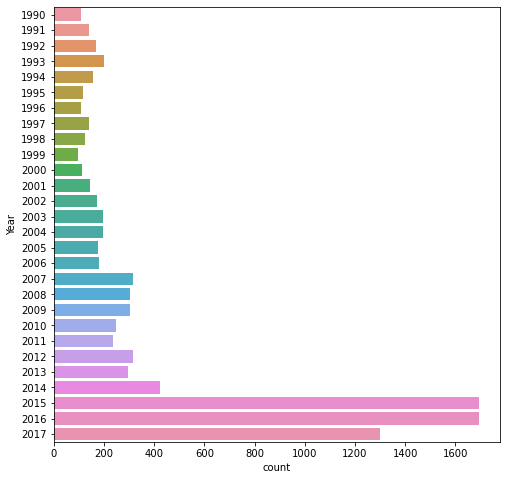

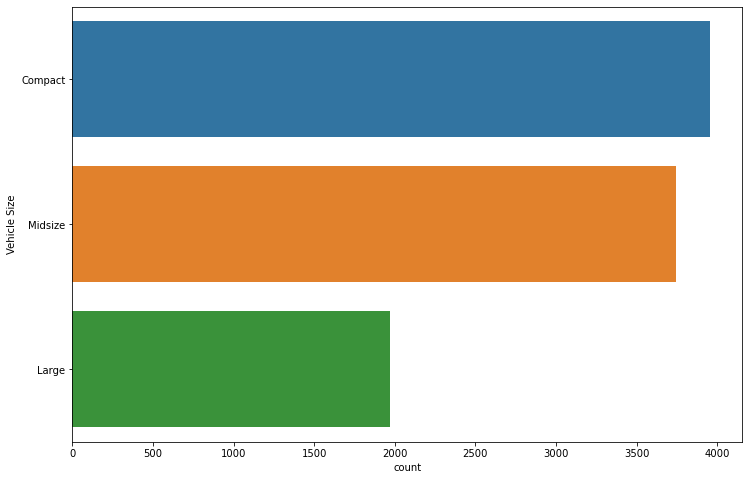

In [292]:
#BMW , Audi , Honda , Nissan , Toyota these are the top popular brands.

#Year

plt.figure(figsize = (8,8))
sns.countplot(y = "Year", data = out_xdf);

#2015 , 2016 are the most popular

## let's check it with the price

plt.figure(figsize = (12,8))
sns.countplot(y = "Vehicle Size", data = out_xdf);

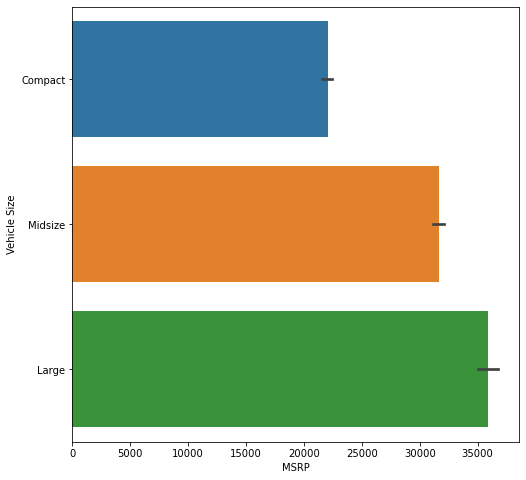

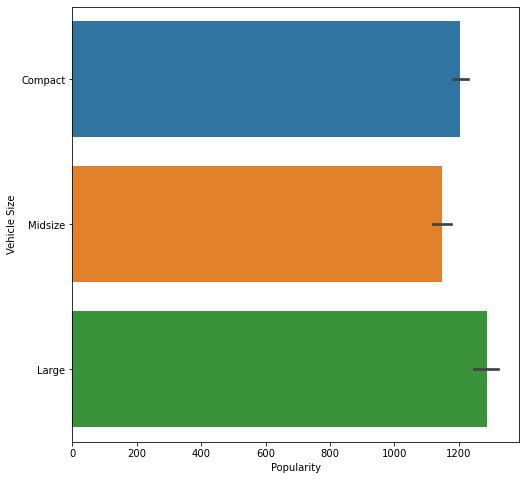

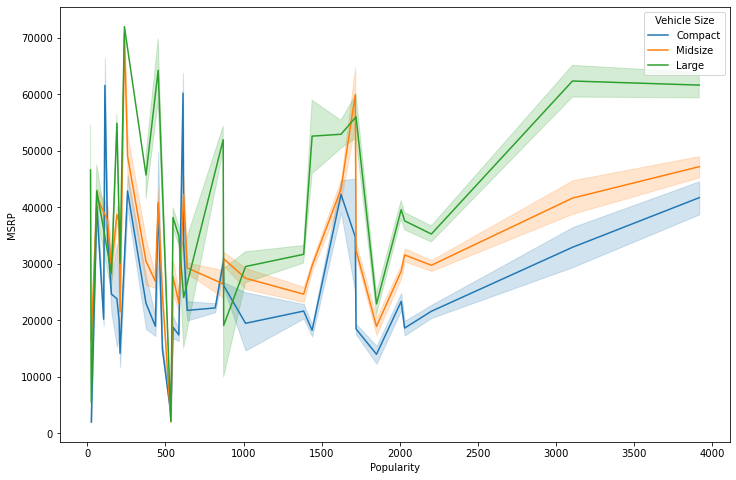

In [293]:
## with respect to price


plt.figure(figsize = (8,8))
sns.barplot(y = "Vehicle Size", x = "MSRP", data = out_xdf);

## With respect to popularity

plt.figure(figsize = (8,8))
sns.barplot(y = "Vehicle Size", x = "Popularity", data = out_xdf);

plt.figure(figsize = (12,8))
sns.lineplot(x = "Popularity", y = "MSRP", data = out_xdf, hue = "Vehicle Size");

### Coorelation of Attributes ###


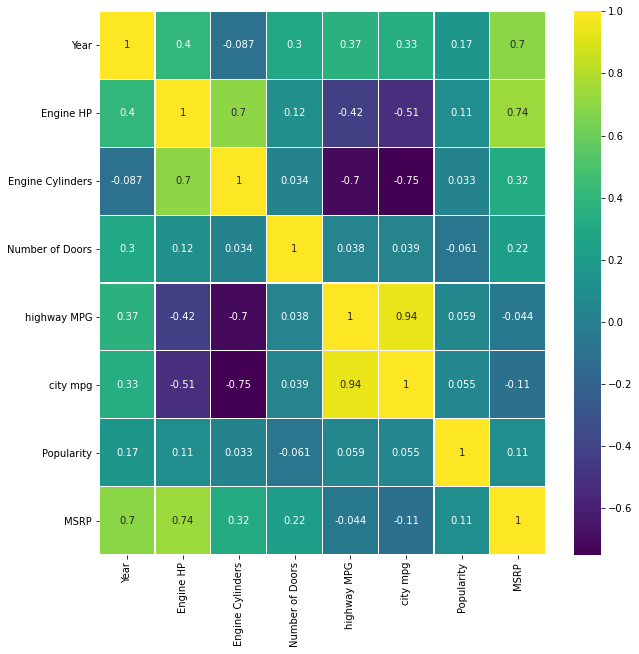

In [294]:
## Let's see the correleation of all the features

corr = out_xdf.corr()

plt.figure(figsize = (10,10))
sns.heatmap(corr, cmap = 'viridis', annot = True, linewidth = 0.1);

In [297]:
from sklearn.grid_search import GridSearchCV                                                                                                                                                                                                                             arch import GridSearchCV

ModuleNotFoundError: No module named 'sklearn.grid_search'

In [48]:
#Preprocessing

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

def multihot_encode(df, column):
    df = df.copy()
    
    df[column] = df[column].apply(lambda x: x.split(','))
    
    all_categories = np.unique(df[column].sum())
    
    for category in all_categories:
        df[column + '_' + category] = df.apply(lambda x: 1 if category in x[column] else 0, axis=1)
    
    df = df.drop(column, axis=1)
    
    return df

def onehot_encode(df, column):
    df = df.copy()
    dummies = pd.get_dummies(df[column], prefix=column)
    df = pd.concat([df, dummies], axis=1)
    df = df.drop(column, axis=1)
    return df

def preprocess_inputs(df):
    df = df.copy()
    
    # Fill multi-hot column missing values
    df['Market Category'] = df['Market Category'].fillna("Missing")
    
    # Multi-hot encoding
    df = multihot_encode(df, column='Market Category')
    
    # One-hot encoding
    for column in df.select_dtypes('object').columns:
        df = onehot_encode(df, column=column)
    
    # Fill remaining missing values
    df['Engine HP'] = df['Engine HP'].fillna(df['Engine HP'].mean())
    for column in ['Engine Cylinders', 'Number of Doors']:
        df[column] = df[column].fillna(df[column].mode()[0])
    
    # Split df into X and y
    y = df['MSRP']
    X = df.drop('MSRP', axis=1)
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)
    
    # Scale X
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)
    
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = preprocess_inputs(df)

X_train


,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,Market Category_Crossover,Market Category_Diesel,Market Category_Exotic,...,Vehicle Style_Convertible,Vehicle Style_Convertible SUV,Vehicle Style_Coupe,Vehicle Style_Crew Cab Pickup,Vehicle Style_Extended Cab Pickup,Vehicle Style_Passenger Minivan,Vehicle Style_Passenger Van,Vehicle Style_Regular Cab Pickup,Vehicle Style_Sedan,Vehicle Style_Wagon
10660,0.747903,-0.737725,-0.909115,0.643471,0.259193,0.141748,2.858336,-0.447632,-0.128761,-0.213334,...,-0.269077,-0.051431,-0.336677,-0.245219,-0.236581,-0.189135,-0.103865,-0.191839,-0.584043,-0.230298
4140,0.090904,0.763695,1.324400,0.643471,-0.396376,0.030925,0.051096,-0.447632,-0.128761,-0.213334,...,-0.269077,-0.051431,-0.336677,-0.245219,-0.236581,-0.189135,-0.103865,-0.191839,-0.584043,-0.230298
11414,-1.091696,-0.636402,0.207643,0.643471,-0.505638,-0.412365,-0.374201,-0.447632,-0.128761,-0.213334,...,-0.269077,-0.051431,-0.336677,-0.245219,-0.236581,5.287236,-0.103865,-0.191839,-0.584043,-0.230298
5119,0.353704,0.726850,0.207643,0.643471,-0.177853,-0.301542,-0.947065,-0.447632,-0.128761,-0.213334,...,-0.269077,-0.051431,-0.336677,-0.245219,-0.236581,-0.189135,-0.103865,-0.191839,1.712202,-0.230298
2639,-1.617295,-0.452179,0.207643,-1.619190,-0.833422,-0.634010,-0.115264,-0.447632,-0.128761,-0.213334,...,-0.269077,-0.051431,-0.336677,-0.245219,4.226880,-0.189135,-0.103865,-0.191839,-0.584043,-0.230298
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7813,0.747903,0.211025,0.207643,0.643471,-0.068591,-0.190720,1.081972,2.233979,-0.128761,-0.213334,...,-0.269077,-0.051431,-0.336677,-0.245219,-0.236581,-0.189135,-0.103865,-0.191839,-0.584043,-0.230298
10955,0.616503,1.215042,1.324400,0.643471,-1.051945,-0.744832,0.334395,-0.447632,-0.128761,-0.213334,...,-0.269077,-0.051431,-0.336677,4.077992,-0.236581,-0.189135,-0.103865,-0.191839,-0.584043,-0.230298
905,-1.748695,-0.912737,-0.909115,0.643471,-0.068591,-0.190720,-0.817596,-0.447632,-0.128761,-0.213334,...,-0.269077,-0.051431,-0.336677,-0.245219,-0.236581,-0.189135,-0.103865,-0.191839,-0.584043,-0.230298
5192,-0.171896,-0.783780,-0.909115,-1.619190,0.696239,0.252570,-0.933143,-0.447632,-0.128761,-0.213334,...,-0.269077,-0.051431,2.970209,-0.245219,-0.236581,-0.189135,-0.103865,-0.191839,-0.584043,-0.230298


In [49]:
y_train

10660    22675
4140     85935
11414    23640
5119     37150
2639      3265
         ...  
7813     53500
10955    47975
905       2000
5192     22220
235      32315
Name: MSRP, Length: 8339, dtype: int64

In [50]:
##Dimensionality Reduction

#We have a very high number of columns for our purposes, so let's reduce the data using PCA to have only 100 columns (to increase training speed).

from sklearn.decomposition import PCA
n_components = 100

pca = PCA(n_components=n_components)
pca.fit(X_train)

X_train_reduced = pd.DataFrame(pca.transform(X_train), index=X_train.index, columns=["PC" + str(i) for i in range(1, n_components + 1)])
X_test_reduced = pd.DataFrame(pca.transform(X_test), index=X_test.index, columns=["PC" + str(i) for i in range(1, n_components + 1)])

X_train_reduced

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC91,PC92,PC93,PC94,PC95,PC96,PC97,PC98,PC99,PC100
10660,2.338385,-1.961900,0.683287,0.948337,-0.339020,-0.987637,5.554458,2.286205,-0.588030,0.210059,...,-0.535148,-0.344657,-1.000718,-0.701990,0.102920,0.659060,0.065345,-0.598862,-0.261834,0.685438
4140,-1.821908,-1.206489,-2.117671,0.771812,0.208233,0.243789,-1.052004,-0.349461,-2.761172,-2.563067,...,-0.707366,-0.173897,-0.590488,1.739049,-0.908263,2.378944,-0.187079,1.347627,-0.283702,-1.431852
11414,0.422411,-2.874007,-0.068210,0.739321,0.208427,-2.880418,-0.999130,2.829804,0.850177,2.407608,...,-0.115464,-2.088807,-1.571831,-0.080232,0.246929,0.539760,-0.562032,-0.427301,-0.697709,1.269789
5119,-2.812989,2.391384,-0.729086,-1.028016,0.784554,-2.356340,-1.101751,-1.961310,-1.136603,0.129974,...,0.155841,-0.291196,0.086068,-1.008490,1.447917,-0.531702,-0.106038,0.127881,0.089193,0.691435
2639,0.004687,-3.111499,3.722364,0.683376,0.862930,0.097292,-1.094408,-2.471326,0.959292,-1.049449,...,-0.602787,-0.147663,-0.032788,-0.394850,0.243708,-0.335682,0.071343,-0.322024,-0.339993,0.127900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7813,-1.950978,1.189877,-4.161455,-1.108577,-0.838320,1.731235,3.440410,-1.614430,2.051364,-0.615615,...,-1.323479,0.443311,-1.311943,0.487797,0.799716,0.711195,-0.346353,-1.542841,-0.572017,-0.047990
10955,-1.420283,-3.921642,0.339218,1.923648,0.352516,0.868700,-0.858711,1.162588,0.411293,-3.691134,...,-0.643004,0.200093,-0.215002,0.365737,0.634446,-0.169566,0.198818,-0.544369,0.122805,-0.158561
905,3.237830,1.845638,1.869801,-1.839940,-1.992291,0.160661,-2.461686,-1.454609,-2.287739,-0.337833,...,-0.544007,0.313324,-0.016334,0.550853,0.135915,1.326320,-0.161936,-0.199719,-0.078041,0.222915
5192,1.584154,-0.166049,0.581187,-1.454694,2.314549,-1.659675,-0.422975,1.036524,-0.382323,2.422198,...,-0.841829,0.487549,-1.873647,-0.430140,1.307370,0.712007,-0.102142,0.093799,-0.406645,-0.487082


In [51]:
##Training

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import LinearSVR, SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

models = {
    "                     Linear Regression": LinearRegression(),
    " Linear Regression (L2 Regularization)": Ridge(),
    " Linear Regression (L1 Regularization)": Lasso(),
    "                   K-Nearest Neighbors": KNeighborsRegressor(),
    "                        Neural Network": MLPRegressor(),
    "Support Vector Machine (Linear Kernel)": LinearSVR(),
    "   Support Vector Machine (RBF Kernel)": SVR(),
    "                         Decision Tree": DecisionTreeRegressor(),
    "                         Random Forest": RandomForestRegressor(),
    "                     Gradient Boosting": GradientBoostingRegressor()
}

for name, model in models.items():
    model.fit(X_train_reduced, y_train)
    print(name + " trained.")


                     Linear Regression trained.
 Linear Regression (L2 Regularization) trained.
 Linear Regression (L1 Regularization) trained.
                   K-Nearest Neighbors trained.


C:\Users\Priyanka\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


                        Neural Network trained.
Support Vector Machine (Linear Kernel) trained.
   Support Vector Machine (RBF Kernel) trained.
                         Decision Tree trained.
                         Random Forest trained.
                     Gradient Boosting trained.


In [52]:
##Results

for name, model in models.items():
    print(name + " R^2 Score: {:.5f}".format(model.score(X_test_reduced, y_test)))

                     Linear Regression R^2 Score: 0.77266
 Linear Regression (L2 Regularization) R^2 Score: 0.77266
 Linear Regression (L1 Regularization) R^2 Score: 0.77268
                   K-Nearest Neighbors R^2 Score: 0.77669
                        Neural Network R^2 Score: 0.52850
Support Vector Machine (Linear Kernel) R^2 Score: -0.25441
   Support Vector Machine (RBF Kernel) R^2 Score: -0.03008
                         Decision Tree R^2 Score: 0.75606
                         Random Forest R^2 Score: 0.82422
                     Gradient Boosting R^2 Score: 0.79397


#### R ^2

the higher the R-squared, the better the model fits the data. 

The top models are :
 Decision Tree R^2 Score: 0.75606
 Random Forest R^2 Score: 0.82422
 Gradient Boosting R^2 Score: 0.79397
 
 So the best one Random Forest and Gradient Boosting 
Boosting will reduce error mainly by reducing bias (and also to some extent variance)  On the other hand, Random Forest will fully grown decision trees (low bias, high variance). It will tackle the error reduction task in the opposite way: by reducing variance.